In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/My Drive/bank.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()
# No null vaues in the dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# statistical information of the columns total count,mean,max,standard deviation etc.
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# At this point I think below two columns are not necessary so dropping them
df = df.drop("RowNumber",axis=1)
df = df.drop("Surname",axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
# There appear to be no NaN values in our dataset, so separating our predictors (X) from our target variable (y).
#3. Distinguish the feature and target set 
X = df.iloc[:, 2:11].values
y = df.iloc[:, 11].values
print(X[:10,:], '\n')
print(y[:10])

[['France' 'Female' 42 2 0.0 1 1 1 101348.88]
 ['Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
 ['France' 'Female' 42 8 159660.8 3 1 0 113931.57]
 ['France' 'Female' 39 1 0.0 2 0 0 93826.63]
 ['Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]
 ['Spain' 'Male' 44 8 113755.78 2 1 0 149756.71]
 ['France' 'Male' 50 7 0.0 2 1 1 10062.8]
 ['Germany' 'Female' 29 4 115046.74 4 1 0 119346.88]
 ['France' 'Male' 44 4 142051.07 2 0 1 74940.5]
 ['France' 'Male' 27 2 134603.88 1 1 1 71725.73]] 

[1 0 1 0 0 1 0 1 0 0]


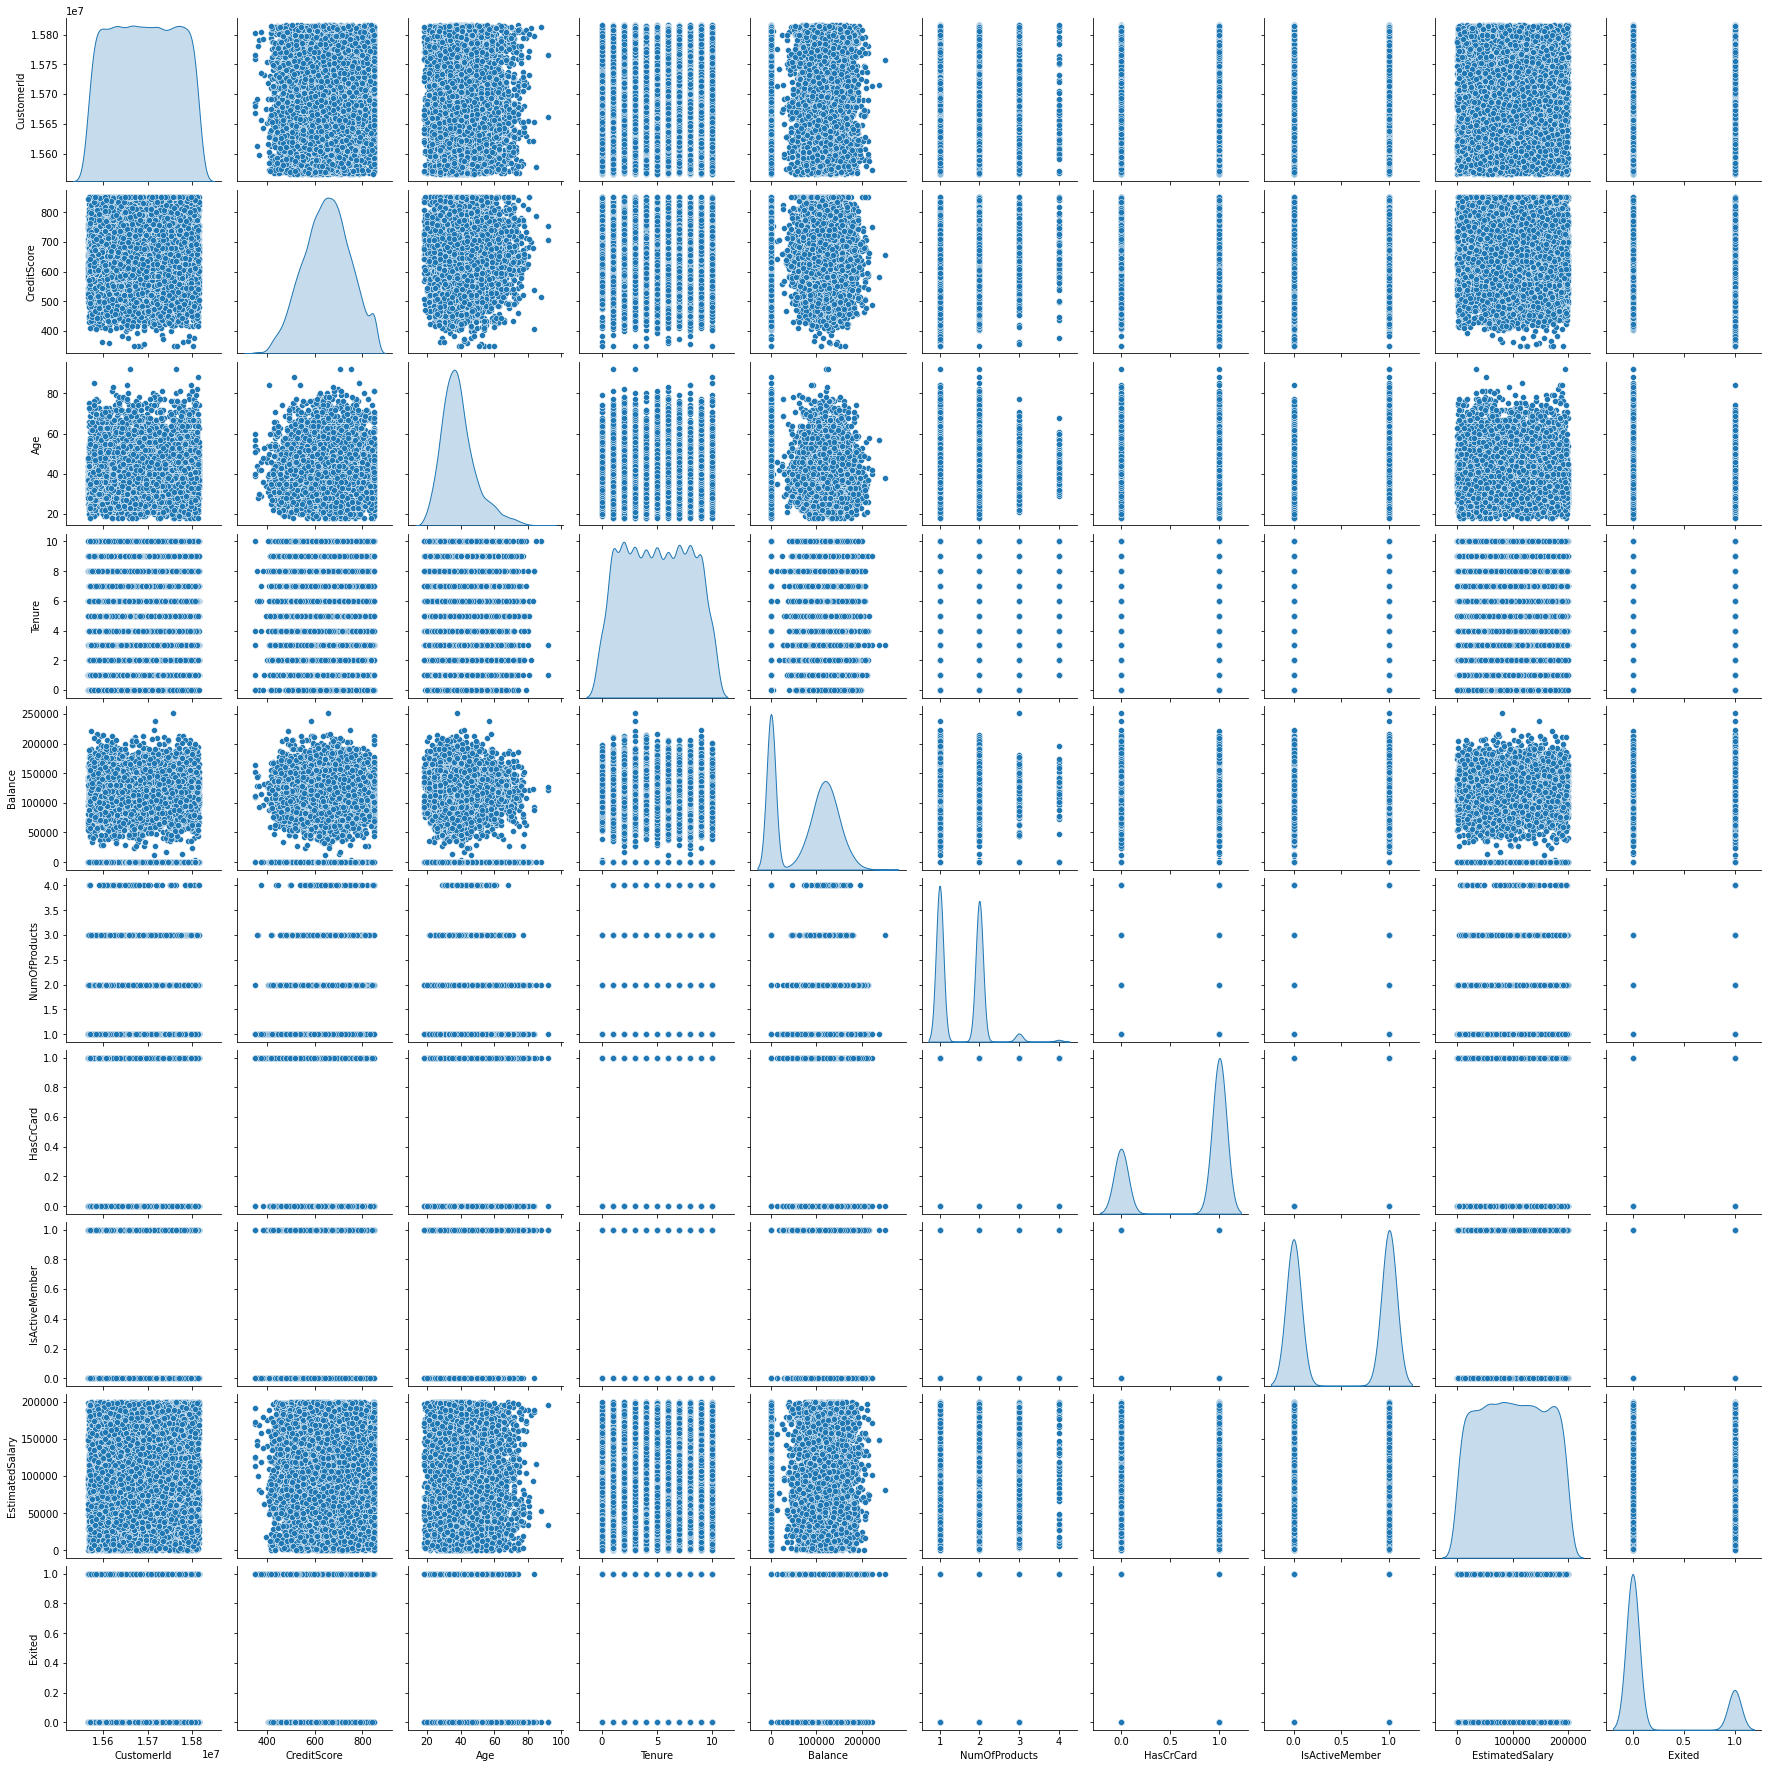

In [12]:
import seaborn as sns
sns.pairplot(df,diag_kind = 'kde');

In [13]:
#cunverting categorical features into onehot encoding
df = pd.get_dummies(df)

In [14]:
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [15]:
#explorinfg column names
df.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [16]:
# Divide the data set into training and test sets
#getting the features and labels and finally splitting the test and train data.


from sklearn.model_selection import train_test_split
X = df[['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
        'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male']]
Y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#let us scale the data as features are on different scales which might be a problem while modelling
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
scaler = preprocessing.MinMaxScaler()
# MinMaxScalar has been used here. You can go ahead and use the other scalars available and chcek the effect on the results.
#fitting the transform on test and train separately
#Normalize the train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.62356344, 0.556     , 0.14864865, ..., 0.        , 0.        ,
        1.        ],
       [0.20836517, 0.552     , 0.14864865, ..., 0.        , 1.        ,
        0.        ],
       [0.840853  , 0.524     , 0.39189189, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.44107141, 0.644     , 0.36486486, ..., 0.        , 1.        ,
        0.        ],
       [0.16873942, 0.626     , 0.28378378, ..., 0.        , 1.        ,
        0.        ],
       [0.82881647, 0.826     , 0.32432432, ..., 0.        , 0.        ,
        1.        ]])

In [17]:
# Scaling data  (Above code takec are of it so just commenting this): Normalize the train and test data
#from sklearn.preprocessing import StandardScaler

# Define the scaler 
#scaler = StandardScaler().fit(X_train)


# Scale the train set
#X_train = scaler.transform(X_train)

# Scale the test set
#X_test = scaler.transform(X_test)

#Normalizing data, but with scaling data accuracy is much better so used scaling
#X_train = preprocessing.normalize(X_train)


In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 14)
(2000, 14)
(8000,)
(2000,)


In [19]:
#Import Keras library and packages
import keras
import sys
from keras.models import Sequential #to initialize NN
from keras.layers import Dense #used to create layers in NN

In [20]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
model = Sequential()

In [21]:
#Input Layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14 ))
model.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [22]:
model.compile(optimizer = 'adam',loss= "binary_crossentropy",metrics=["accuracy"])

In [23]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100  ) # Accuracy is about 86%

Epoch 1/100
800/800 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.7968
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4610 - accuracy: 0.7972
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4489 - accuracy: 0.8050
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.8099
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4345 - accuracy: 0.8116
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8104
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4321 - accuracy: 0.8091
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4313 - accuracy: 0.8091
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4306 - accuracy: 0.8080
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4313 - accura

In [36]:
# Making PREDICTION
#Predicting the Test set results
y_pred = model.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [37]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1542,   43],
       [ 236,  179]])

If we run our confusion matrix, we can see that out of 2000 observation the model accurately predicted 1534 plus 185 correct predictions and 230 plus 51 incorrect predictions.

In [38]:
accuracy = (1534+185)/(2000)
accuracy

0.8595

In [39]:
#Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.860
Loss: 0.345


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

Y_pred_cls = model.predict_classes(X_test, batch_size=10, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

63/63 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8605
Accuracy Model1 (Dropout): 0.8604999780654907
Recall_score: 0.43132530120481927
Precision_score: 0.8063063063063063
F-score: 0.5620094191522763


array([[1542,   43],
       [ 236,  179]])

In [51]:
# Using different dense and model lets evaluate

model.add(Dense(64, input_shape = (14,), activation = 'relu'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

In [53]:
from tensorflow.keras import optimizers
sgd = optimizers.Adam(lr = 0.001)

In [54]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1

In [58]:
model.fit(X_train, y_train.values, batch_size = 500, epochs = 50, verbose = 1)

Epoch 1/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8651
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3299 - accuracy: 0.8630
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8655
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8651
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8643
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8646
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.8630
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8626
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8631
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8636
Epoch 11/50
16/16 [

In [59]:
#Evaluation
#Keras model can be evaluated with evaluate() function

X_test = preprocessing.normalize(X_test)

In [60]:
results = model.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8280


In [61]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.40167370438575745, 0.828000009059906]


In [62]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

63/63 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8280
Accuracy Model1 (Dropout): 0.828000009059906
Recall_score: 0.27710843373493976
Precision_score: 0.7232704402515723
F-score: 0.40069686411149824


array([[1541,   44],
       [ 300,  115]])

Tried different combinations of model/batch/epoch/dense accuracy is on training and test data set is ~ 86%.

Accuracy improved because of scaled data. With normalized data accuracy score is ~ 82%